# EN.553.436/646 Practice Exam (25 pts.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
muffin = pd.read_csv('muffin.csv', index_col=[0])
display(muffin)

,Flour (g),Sugar (g),Baking Powder (g),Salt (g),Milk (g),Butter (g),Egg (g),Vanilla Extract (g),Satisfaction Score
0,947.042477,475.910641,31.295813,1.471992,478.300401,67.885772,121.382403,15.293038,0.687345
1,948.285769,471.505214,18.631160,3.425659,471.026511,60.069625,121.180302,15.833053,0.717163
2,945.190266,472.536329,25.975007,0.030657,471.805286,64.353825,117.466869,14.743627,0.892798
3,947.368925,472.466836,27.424723,1.668594,470.494941,66.109826,117.524954,13.946905,0.801041
4,947.083648,469.511213,29.660818,3.970857,472.086744,70.120310,117.955204,16.736205,0.444885
...,...,...,...,...,...,...,...,...,...
995,946.054088,469.775896,24.372693,1.302984,467.990077,62.989627,116.552182,14.124618,0.758692
996,946.835300,471.256645,24.877492,1.407795,472.514083,65.917182,118.981002,13.821903,0.836030
997,941.978941,473.078546,21.638041,2.256272,472.780828,57.316414,119.552768,13.052502,0.731702
998,943.556278,471.782608,14.950907,10.213236,469.291715,60.988341,120.027355,15.614330,0.299169


# Problem 1 (12 pts.)

## 1.1 (4 pts.)
Simon is a data scientist employed by Bakers Inc. He runs the following analysis on the `muffin` dataset. Run the cell, then comment on each indicated line to explain what Simon is doing. Note: In comments, we are looking for a brief, one-sentence description of the _intent_ behind the code. A literal description of the Python commands is insufficient.

,Flour (g),Sugar (g),Baking Powder (g),Salt (g),Milk (g),Butter (g),Egg (g),Vanilla Extract (g),Satisfaction Score
Flour (g),2.907266,-0.123464,0.181618,-0.058223,-0.914104,2.451050,0.177538,0.123028,0.003116
Sugar (g),-0.123464,5.581510,-0.840632,-0.134382,1.830755,-4.225802,1.969808,-1.520795,0.109513
Baking Powder (g),0.181618,-0.840632,12.240965,-3.415615,2.310483,7.188243,-2.916673,1.172375,0.099942
Salt (g),-0.058223,-0.134382,-3.415615,6.546198,-0.034046,-0.873916,2.508013,1.438718,-0.224666
Milk (g),-0.914104,1.830755,2.310483,-0.034046,5.918530,-1.693802,3.472835,1.282518,0.035085
Butter (g),2.451050,-4.225802,7.188243,-0.873916,-1.693802,13.151763,-4.033958,2.023605,-0.030282
Egg (g),0.177538,1.969808,-2.916673,2.508013,3.472835,-4.033958,4.689678,0.981421,-0.046845
Vanilla Extract (g),0.123028,-1.520795,1.172375,1.438718,1.282518,2.023605,0.981421,3.145119,-0.069865
Satisfaction Score,0.003116,0.109513,0.099942,-0.224666,0.035085,-0.030282,-0.046845,-0.069865,0.022460


Salt (g)              -0.224666
Vanilla Extract (g)   -0.069865
Egg (g)               -0.046845
Butter (g)            -0.030282
Flour (g)              0.003116
Satisfaction Score     0.022460
Milk (g)               0.035085
Baking Powder (g)      0.099942
Sugar (g)              0.109513
Name: Satisfaction Score, dtype: float64


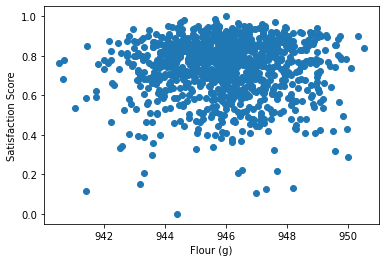

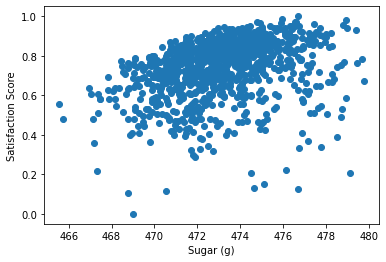

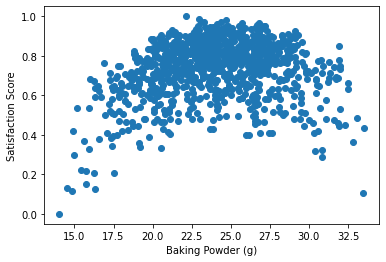

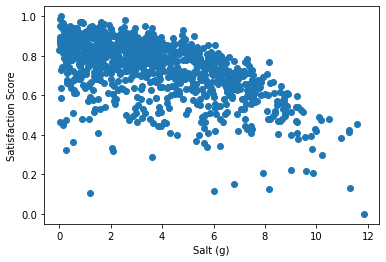

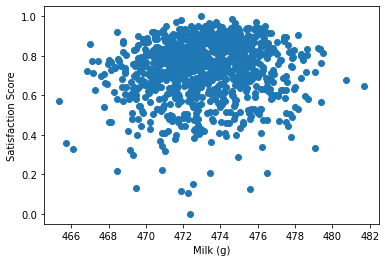

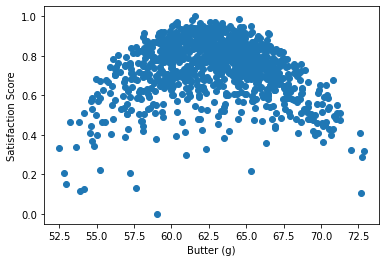

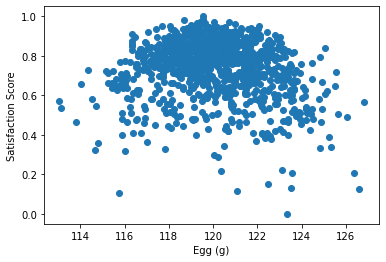

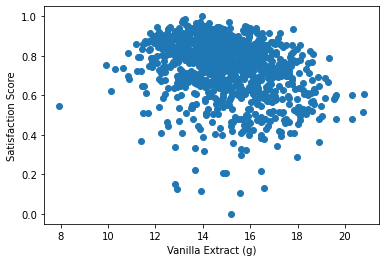

In [3]:
# Compute covariance matrix.
mu = muffin.mean()
dev = muffin - mu
Sig = dev.T @ dev / (muffin.shape[0]-1)
display(Sig)

# Print covariances of variables with satisfaction score.
print(Sig['Satisfaction Score'].sort_values())

# Plot variables against satisfaction score.
for name in Sig.columns[:-1]:
    plt.plot(muffin[name].values, muffin['Satisfaction Score'].values, 'o')
    plt.xlabel(name); plt.ylabel('Satisfaction Score')
    plt.show()

## 1.2 (4 pts.)
Simon is interested in fitting a simple linear model to predict satisfaction score from salt content. That is, he wants to fit a line to the data. Run the cell below, and note that Simon's line does not match the downward trend of the data. 

Correct his code to get a line that does match the downward trend of the data. You are allowed to modify or add code as much as you wish. Run the cell again once you make your correction. Highlight your correction with a comment.

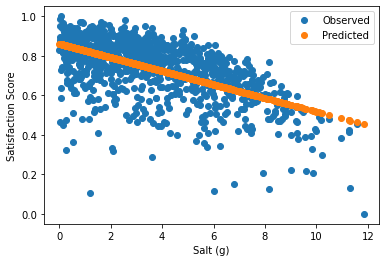

In [4]:
y = muffin['Satisfaction Score'].values
x = muffin['Salt (g)'].values

# Make design matrix have column-of-ones to account for intercept term.
X = np.ones([1000, 2])
X[:,1] = x

Xpinv = np.linalg.inv(X.T @ X) @ X.T
bHat = Xpinv @ y
yHat = X @ bHat

plt.plot(x, y, 'o', label='Observed')
plt.plot(x, yHat, 'o', label='Predicted')
plt.xlabel('Salt (g)')
plt.ylabel('Satisfaction Score')
plt.legend()
plt.show()

## 1.3 (4 pts.)
Run the cell below to see a plot of butter content versus satisfaction score. The plot suggests that it is inappropriate to model the relation between butter content and satisfication score with a line.

Write code in the indicated space to fit a more appropriate curve. You may add as much code as you like. Store the predictions from your model in a variable `yHat`. Uncomment the indicated code fragment to plot your predictions, and run the cell.

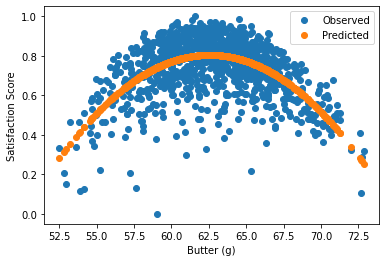

In [5]:
y = muffin['Satisfaction Score'].values
x = muffin['Butter (g)'].values

### Fit a quadratic model.

X = np.ones([1000, 3])
X[:,1] = x
X[:,2] = x**2

Xpinv = np.linalg.inv(X.T @ X) @ X.T
bHat = Xpinv @ y
yHat = X @ bHat

###

plt.plot(x, y, 'o', label='Observed')
plt.plot(x, yHat, 'o', label='Predicted')
plt.xlabel('Butter (g)')
plt.ylabel('Satisfaction Score')
plt.legend()
plt.show()

# Problem 2 (13 pts.)

## 2.1 (5 pts.)
Simon wishes to predict satisfaction score from ingredient quantity. To reduce the dimensionality of his predictors, he performs the following analysis. 

Before running the code, comment on each indicated line to explain what Simon is attempting to do. Note: In comments, we are looking for a brief, one-sentence description of the _intent_ behind the code. A literal description of the Python commands is insufficient.

When you are finished commenting, run the code and observe that there is a problem with the output. Make a correction to exactly one line to fix the problem. Explain your correction with a comment.

Note: For his analysis, Simon adopts the convention of making the features in `X` be the rows rather than columns. This makes `X` of dimension `(n_features, n_samples)`. You may assume this convention is correct for this problem.

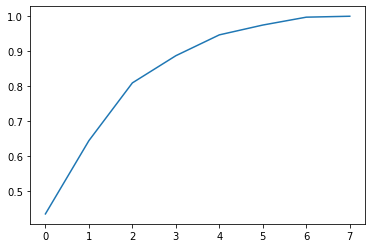

Retain up to no. 1


In [6]:
X = muffin.values.T[:8, :]

# Subtract the mean of each variable.
Z = X - X.mean(axis=1, keepdims=True)
# Compute the sample covariance matrix.
scov = Z @ Z.T / (Z.shape[1]-1)
# Compute the eigenvalues and eigenvectors of the sample covariance matrix.
eigVals, eigVecs = np.linalg.eigh(scov)
# Sort the eigenvalues and eigenvectors in descending order
eigVals = eigVals[::-1]
eigVecs = eigVecs[:, ::-1]

# Make a scree plot
ratio = np.cumsum(eigVals) / np.sum(eigVals)
plt.figure()
plt.plot(ratio)
plt.show()

# Determine up to which PC to retain to account for 60% of variance.
print('Retain up to no.', np.argmax(ratio >= 0.60))

## 2.2 (4 pts.)
To simplify his data for modeling, Simon wishes to perform a PCA transform of `X` by scalar-projecting it onto these first two principal components. Recall that if $e_{i}$ is a principal component and $x_{j}$ is a sample point, the scalar projection of $x_{j}$ onto $e_{i}$ is $e_{i}^{T} x_{j}$. When you are finished, uncomment the commands as indicated and run the cell to see Simon's comparison of a simple linear model built from first two principal components as features versus a simple linear model built from all features. 

In [7]:
from sklearn.linear_model import LinearRegression

# SIMON: "Assess models built from all predictor predictors."
reg1 = LinearRegression().fit(X.T, y.T)
print('R^2, All Predictors Model:\t', reg1.score(X.T, y.T))


# SIMON: "Assess models built from the first two prinicpal components as predictors."
###

X_PCA_2 = eigVecs[:, :2].T @ Z

###
# SIMON: "Assess models built from the first two prinicpal components as predictors."
reg2 = LinearRegression().fit(X_PCA_2.T, y.T) # UNCOMMENT WHEN FINISHED: 
print('R^2, PC Predictors Model:\t', reg2.score(X_PCA_2.T, y.T)) # UNCOMMENT WHEN FINISHED:

# SIMON: "Output shows both models performing poorly."


R^2, All Predictors Model:	 0.43669522091298485
R^2, All Predictors Model:	 0.10761071558802537


## 2.3 (4 pts.)
Recall that the features derived from a PCA transform are uncorrelated by design. Write code to verify that the features derived in the previous problem (the features in `X_PCA_2`) are uncorrelated. Explain how your output verifies that fact in the Markdown cell that follows.

[[1.00000000e+00 2.43670771e-16]
 [2.43670771e-16 1.00000000e+00]]


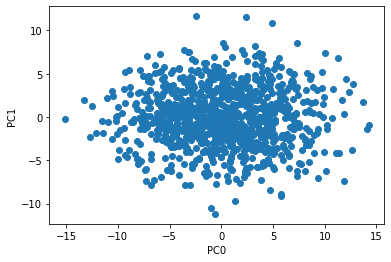

In [8]:
# Preferred answer.
print(np.corrcoef(X_PCA_2))

# Accepted alternative.
plt.plot(X_PCA_2.T[:,0], X_PCA_2.T[:,1], 'o')
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.plot()
plt.show()

### Explanation: _Preffered:_ Correlation matrix shows virtually zero correlation between derived features. _Accepted:_ Scatterplot of derived features against each other shows random scattering with no trend.